In [2]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import binarize
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from mapseq_fxns import sort_by_celltype
# from math import log10
from scipy import stats

# random sample consimment between runs
import random

# import multiple t-tests
from statsmodels.sandbox.stats.multicomp import multipletests



%matplotlib inline

In [7]:
# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/'
out_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/output/'

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import purple_cmp, green_cmp, blue_cmp, orange_cmp

metadata

,mice,species,sex,dataset
0,MMM1,Mmus,male,M194
1,MMF2,Mmus,female,M194
2,MMF3,Mmus,female,M194
3,STM1,Steg,male,M194
4,STM2,Steg,male,M194
5,STF3,Steg,female,M194
6,MMM4,Mmus,male,M220
7,MMF5,Mmus,female,M220
8,STF4,Steg,female,M220
9,STM5,Steg,male,M220


In [6]:
#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)   

In [52]:
# seperate by cell type

omc_type = [sort_by_celltype(omc_bin[i]) for i in range(num_samples)]
omc_pt = [(omc_type[i][omc_type[i]['type']==1000]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]
omc_it = [(omc_type[i][omc_type[i]['type']==10]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]

omc_mm = []
omc_st = []
omc_pt_mm = []
omc_pt_st = []
omc_it_mm = []
omc_it_st = []
mice_mm=[]
mice_st=[]

for i in range(num_samples):
    if metadata.species[i] == 'Mmus':
        omc_mm.append(omc_type[i])
        omc_pt_mm.append(omc_pt[i])
        omc_it_mm.append(omc_it[i])
        mice_mm.append(mice[i])
    else:
        omc_st.append(omc_type[i])
        omc_pt_st.append(omc_pt[i])
        omc_it_st.append(omc_it[i])
        mice_st.append(mice[i])

omc_mm_all = pd.concat(omc_mm)
omc_st_all = pd.concat(omc_st)

In [53]:
def clean_up_data(df_dirty):
    # drop unused areas
    to_drop = ['OB', 'ACAi', 'ACAc', 'HIP']
    dropped = df_dirty.drop(to_drop, axis=1)

    # change RN to bs
    replaced = dropped.rename(columns={'RN':'BS'})

    return replaced


In [54]:
# clean-up datasets
# drop OB, ACAc, HIP
to_drop = ['OB', 'ACAi', 'ACAc', 'HIP']
omc_st_all = omc_st_all.drop(to_drop, axis=1)
omc_st_all = omc_st_all.drop(to_drop, axis=1)

# change RN to BS
omc_st_all = omc_st_all.rename(columns={'RN':'BS'})
omc_st_all = omc_st_all.rename(columns={'RN':'BS'})


# change type so .25,.5,.75
st_type_col = omc_st_all['type']
st_replace = np.where(st_type_col==1000, 0.75, st_type_col)
st_replace = np.where(st_replace==100, 0.5, st_replace)
st_replace = np.where(st_replace==10, 0.25, st_replace)
omc_st_all['type'] = st_replace

# change type so .25,.5,.75
st_type_col = omc_st_all['type']
st_replace = np.where(st_type_col==1000, 0.75, st_type_col)
st_replace = np.where(st_replace==100, 0.5, st_replace)
st_replace = np.where(st_replace==10, 0.25, st_replace)
omc_st_all['type'] = st_replace

print(omc_st_all.shape)
print(omc_st_all.shape)
omc_st_all.columns

KeyError: "['OB', 'ACAi', 'ACAc', 'HIP'] not found in axis"

In [55]:
for i in range(len(omc_it_mm)):
    omc_it_mm[i] = clean_up_data(omc_it_mm[i])

for i in range(len(omc_pt_mm)):
    omc_pt_mm[i] = clean_up_data(omc_pt_mm[i])

In [56]:
for i in range(len(omc_it_st)):
    omc_it_st[i] = clean_up_data(omc_it_st[i])

for i in range(len(omc_pt_st)):
    omc_pt_st[i] = clean_up_data(omc_pt_st[i])

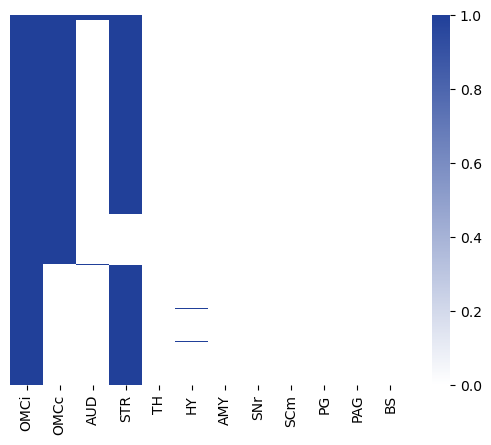

In [57]:
# drop columns that excluded in IT population
omc_it_mm[0]
sns.heatmap(omc_it_mm[0], cmap=blue_cmp)
plt.gca().get_yaxis().set_visible(False)
# create branching graph?

Text(0.5, 0.98, 'OMC it cells')

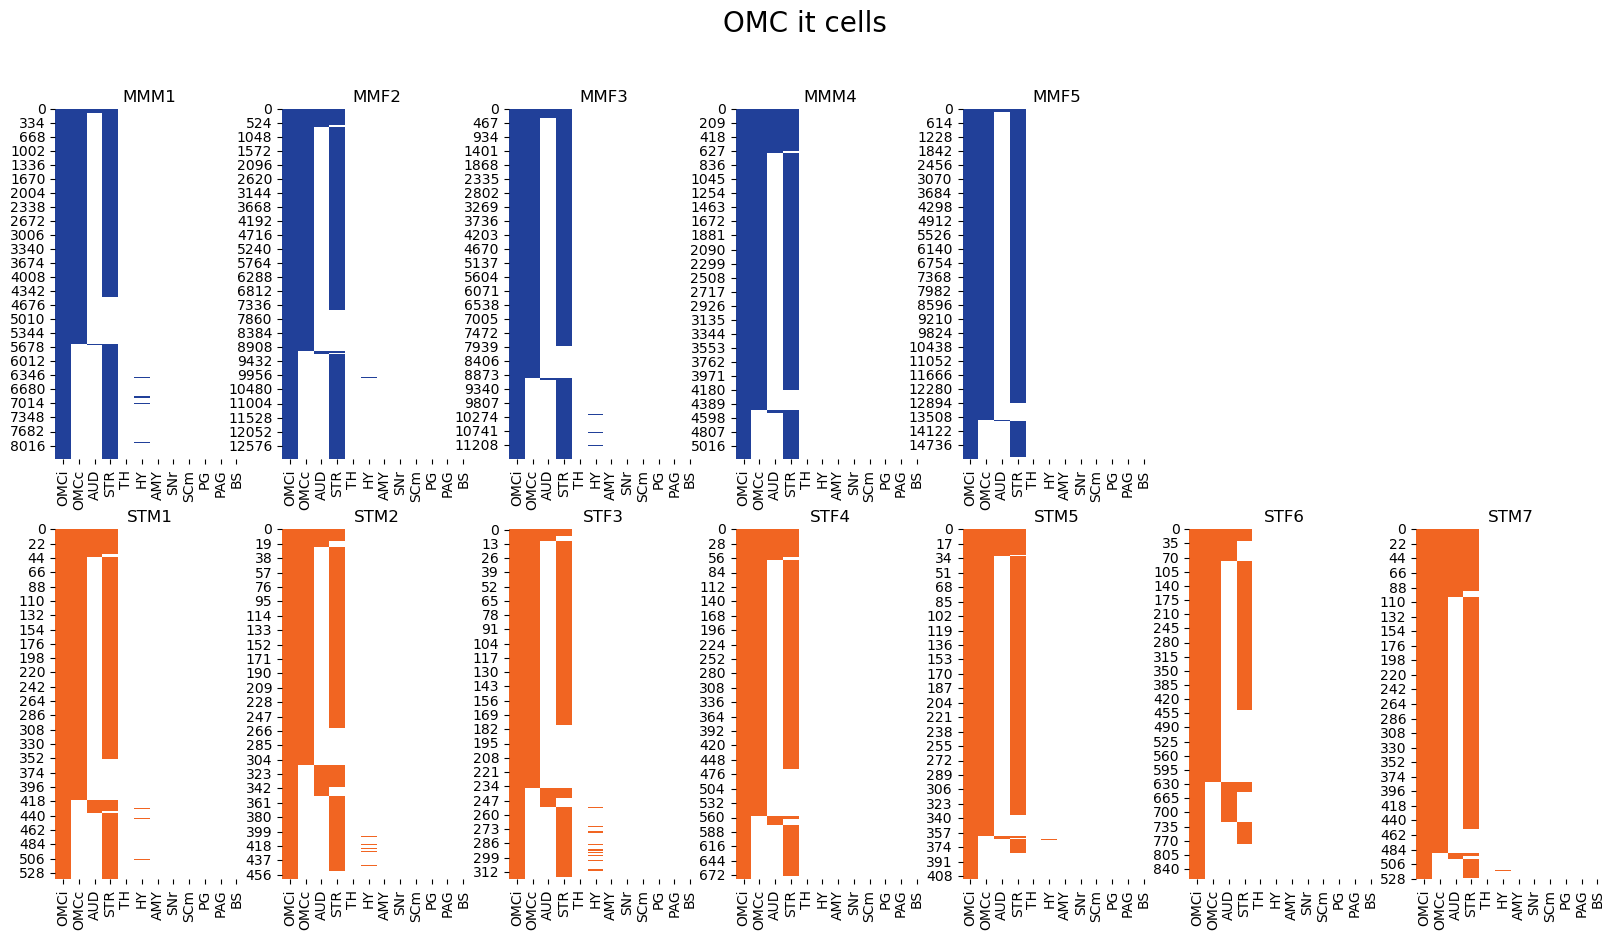

In [59]:
fig, axs = plt.subplots(2,7, figsize=(20,10))

i=0
for ax in axs.flat[:7]:
    if i >= 5:
        ax.axis('off')
    else:

        plot = omc_it_mm[i]
        # sort by cell type
        # plot = plot.sort_values(by=['type']).reset_index(drop=True)
        
        sns.heatmap(plot, cmap=blue_cmp, cbar=False, ax=ax)
        # ax.get_yaxis().set_visible(False)
        ax.set_title(mice_mm[i])
        
    i+=1
    
i=0
for ax in axs.flat[7:]:

    plot = omc_it_st[i]
    # sort by cell type
    # plot = plot.sort_values(by=['type']).reset_index(drop=True)
    
    sns.heatmap(plot, cmap=orange_cmp, cbar=False, ax=ax)
    # ax.get_yaxis().set_visible(False)
    ax.set_title(mice_st[i])

    i+=1

plt.suptitle("OMC it cells", size=20)

Text(0.5, 0.98, 'OMC pt cells')

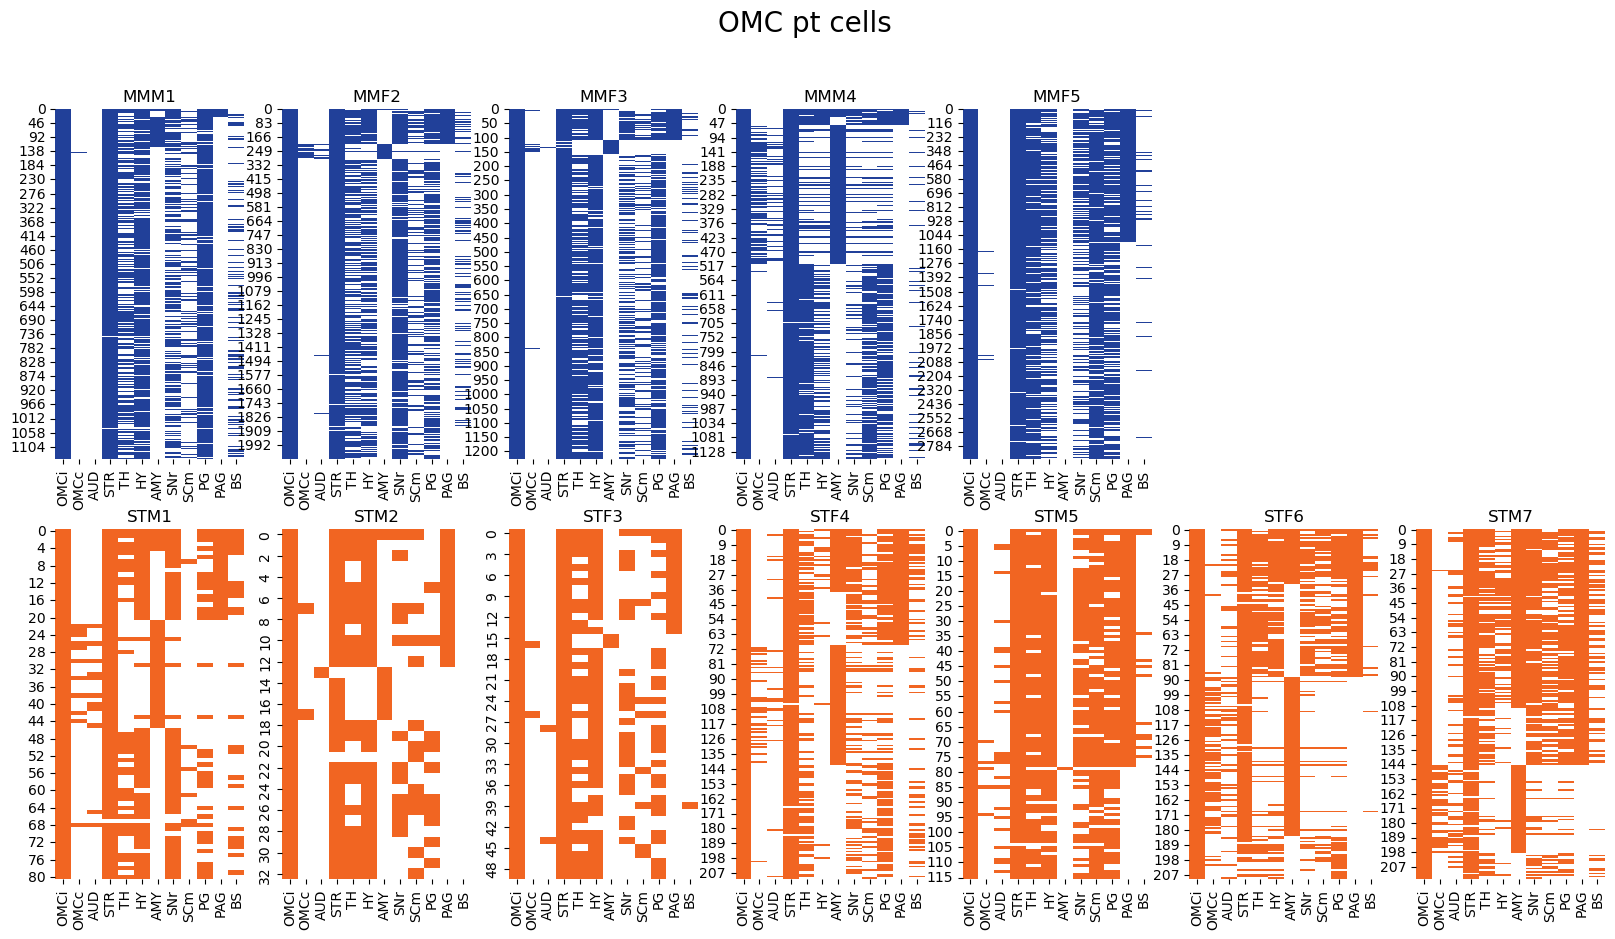

In [60]:
fig, axs = plt.subplots(2,7, figsize=(20,10))

i=0
for ax in axs.flat[:7]:
    if i >= 5:
        ax.axis('off')
    else:
        plot = omc_pt_mm[i]
        # sort by cell type
        # plot = plot.sort_values(by=['type']).reset_index(drop=True)
        
        sns.heatmap(plot, cmap=blue_cmp, cbar=False, ax=ax)
        # ax.get_yaxis().set_visible(False)
        ax.set_title(mice_mm[i])
    
    i+=1
    
i=0
for ax in axs.flat[7:]:

    plot = omc_pt_st[i]
    # sort by cell type
    # plot = plot.sort_values(by=['type']).reset_index(drop=True)
    
    sns.heatmap(plot, cmap=orange_cmp, cbar=False, ax=ax)
    # ax.get_yaxis().set_visible(False)
    ax.set_title(mice_st[i])

    i+=1

plt.suptitle("OMC pt cells", size=20)

In [69]:
mice_mm[i]

'MMM1'

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fas

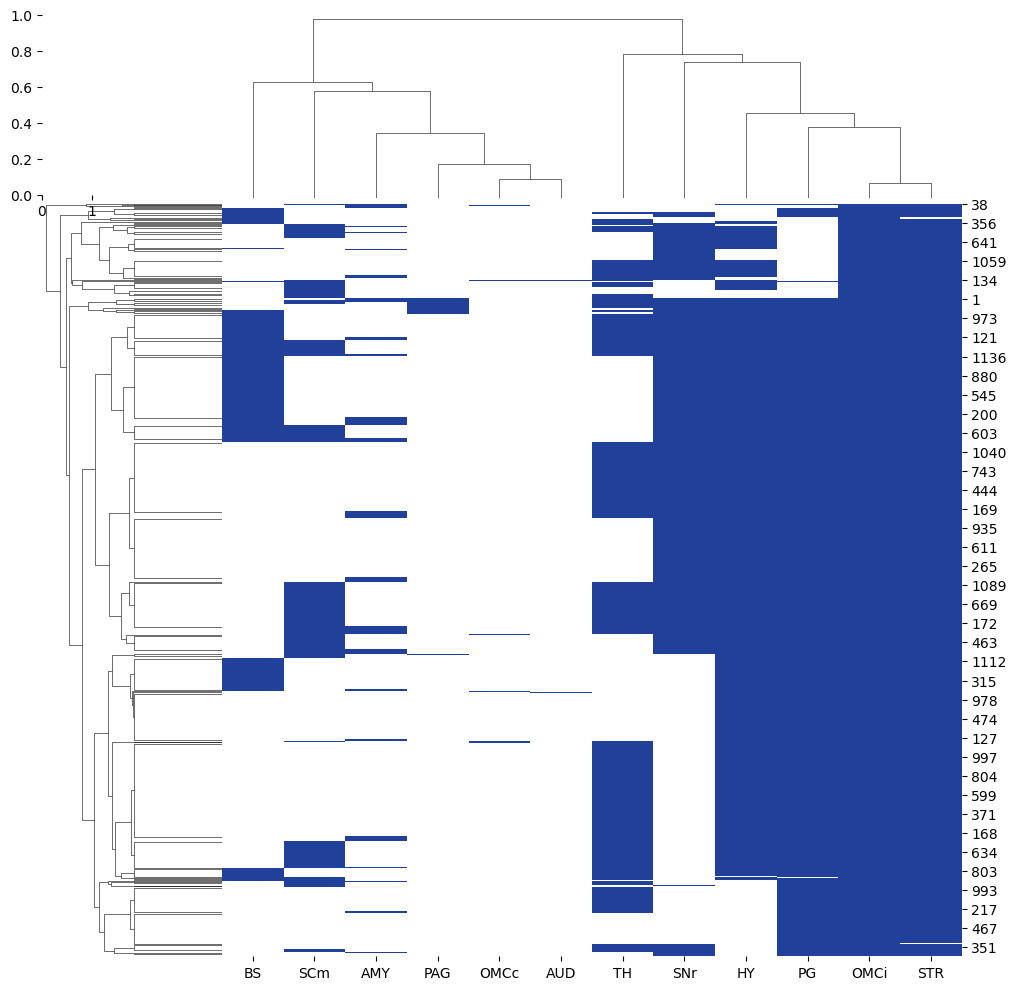

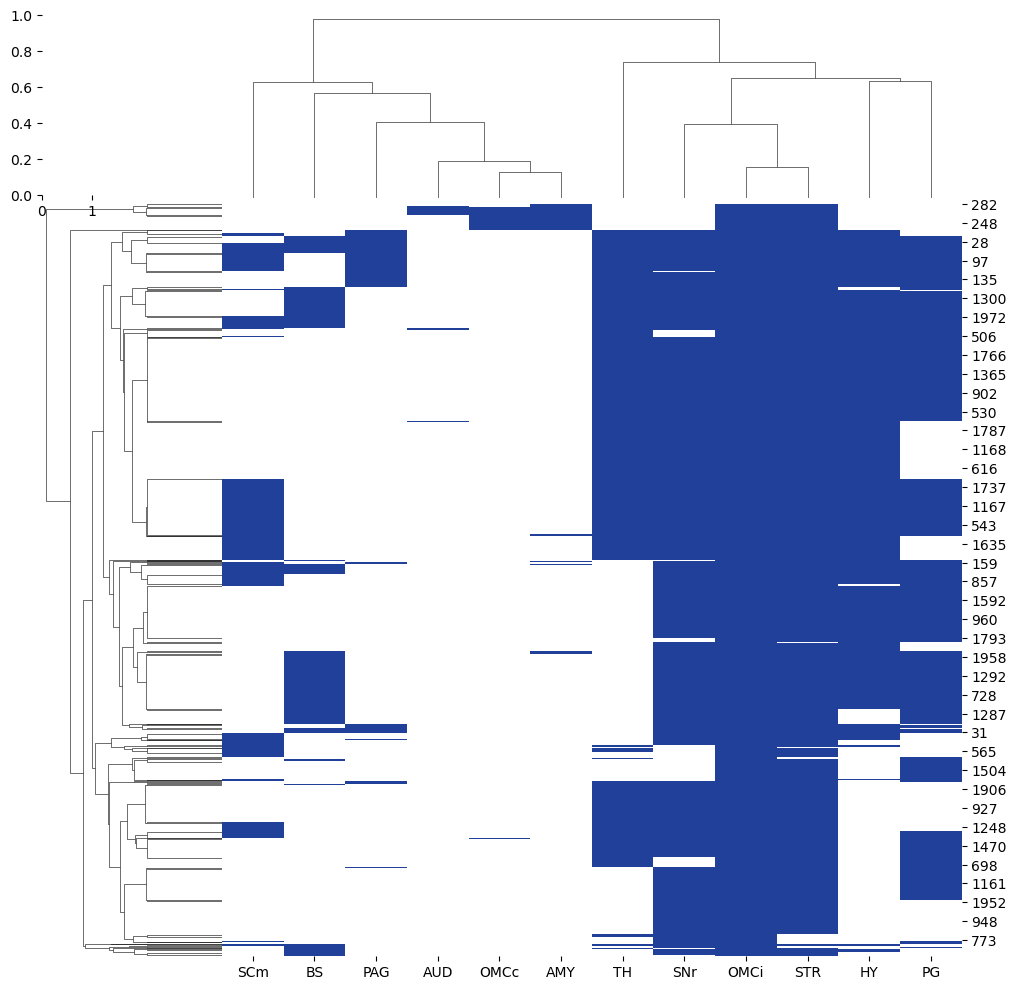

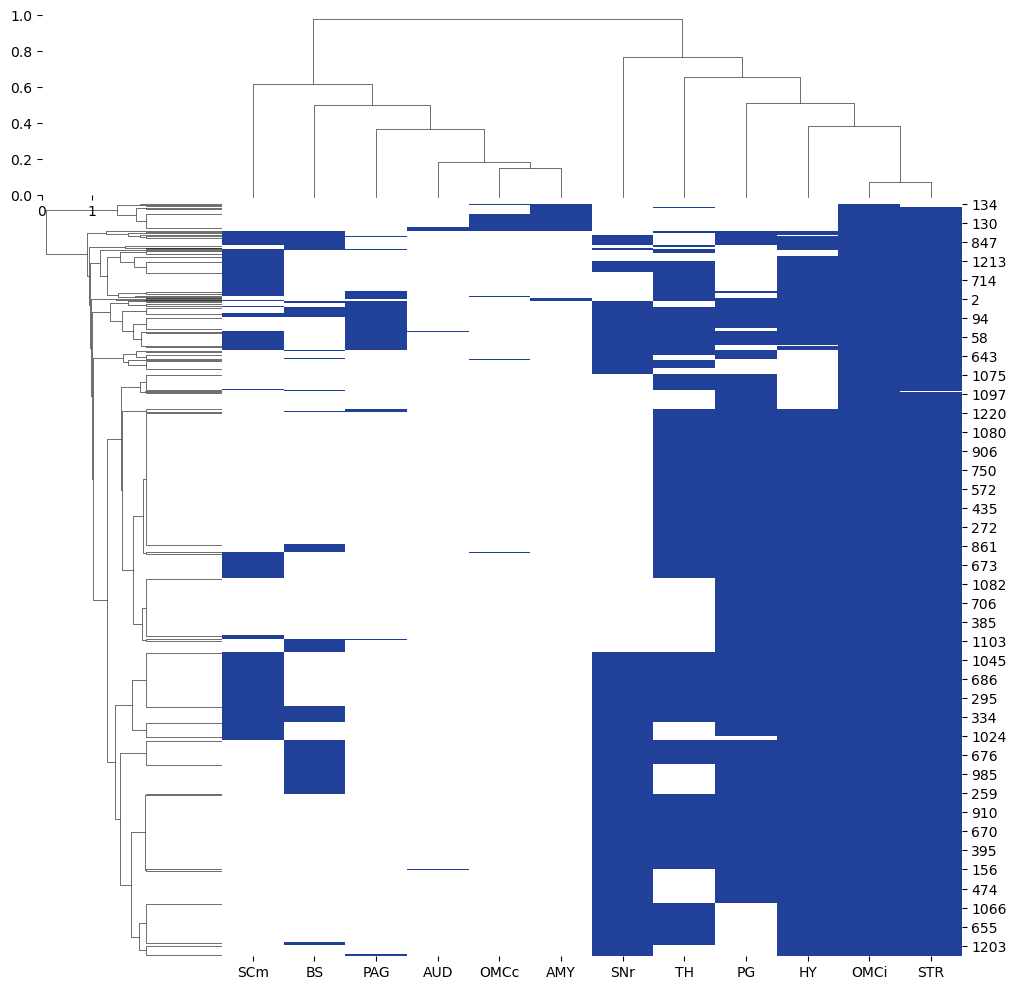

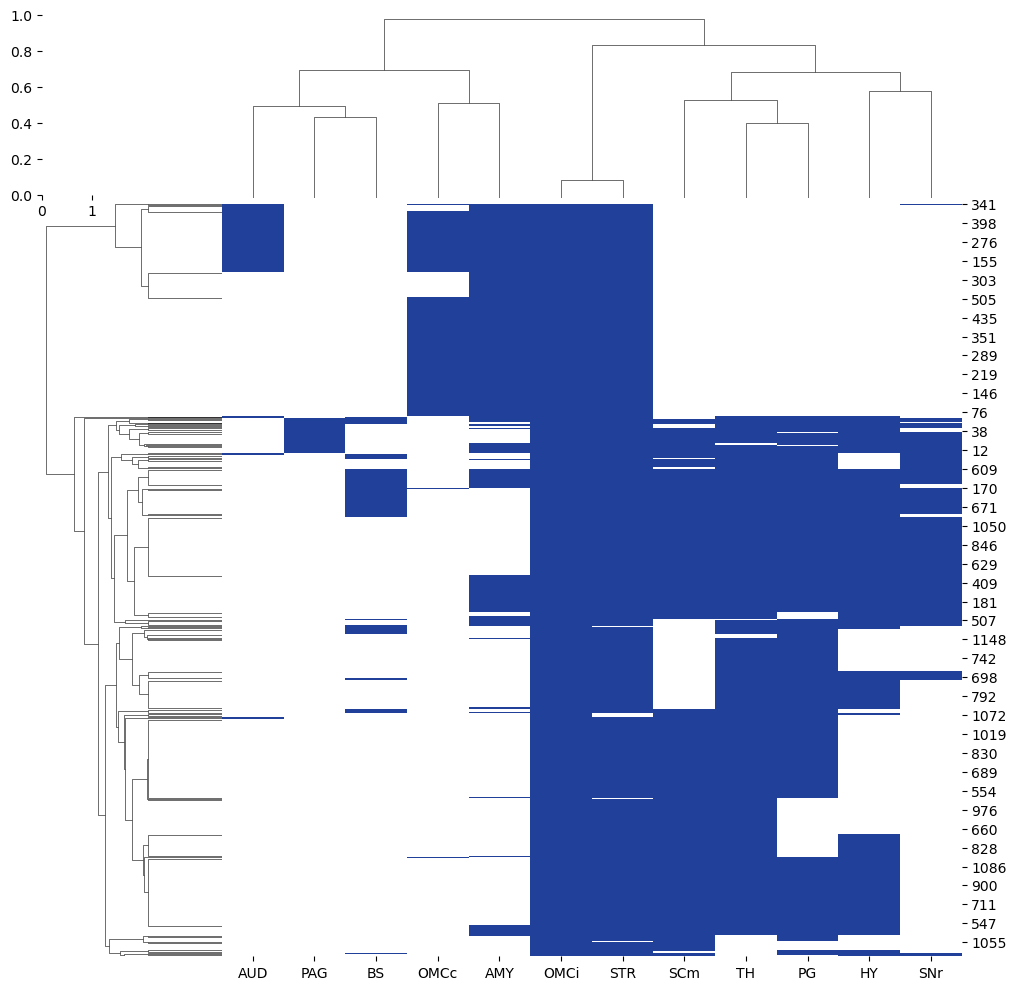

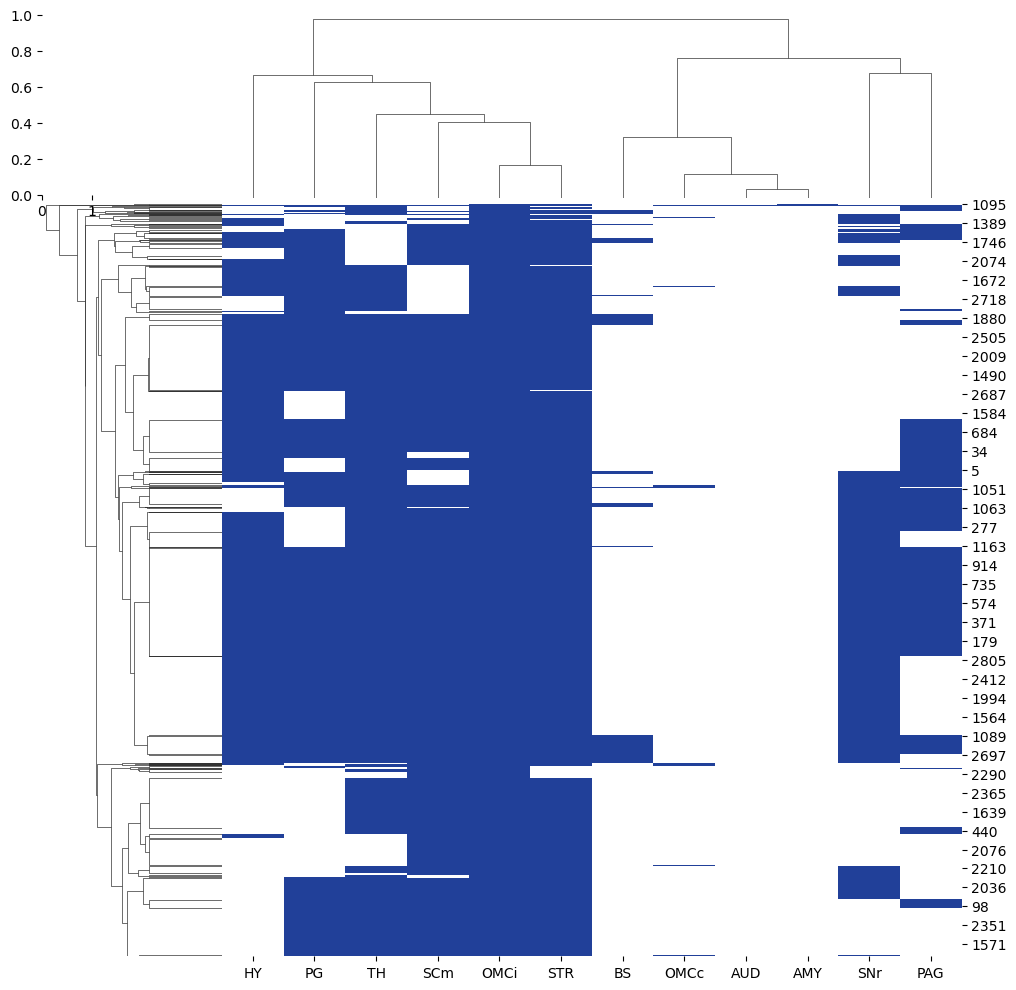

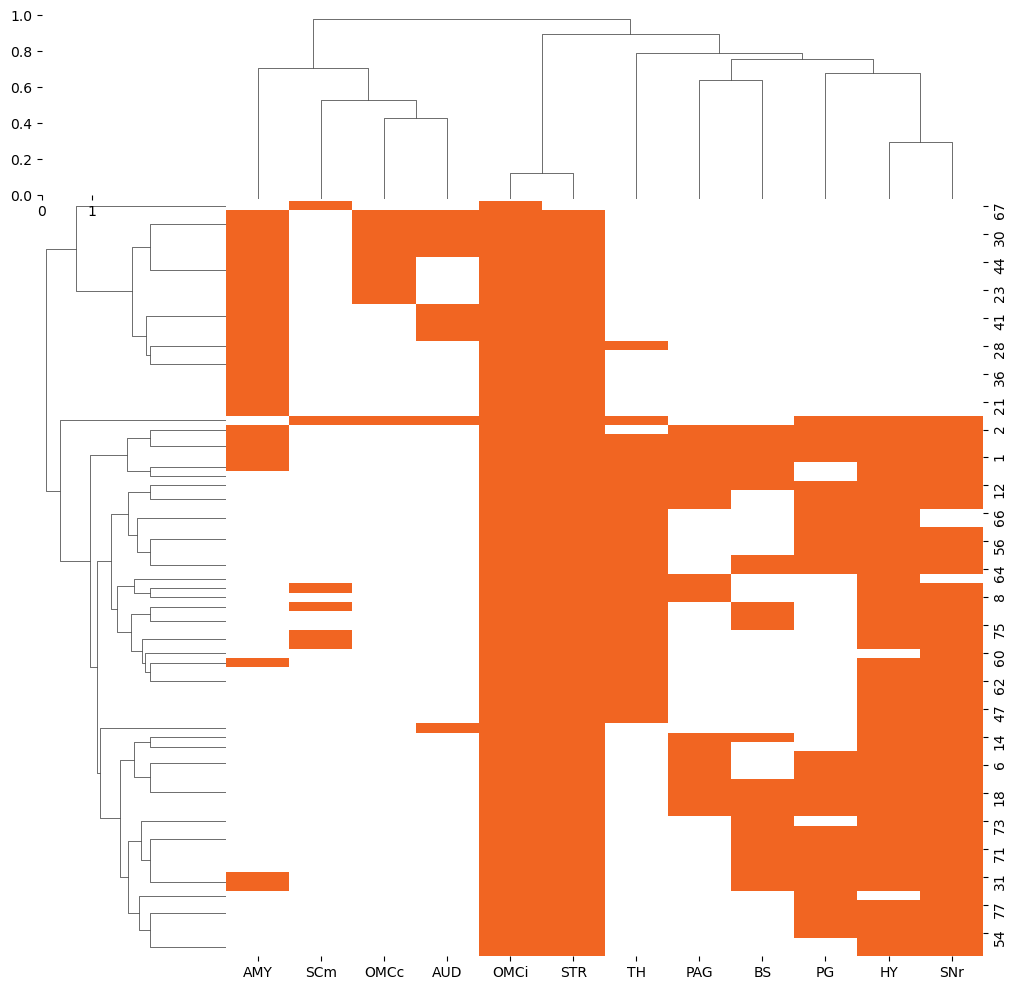

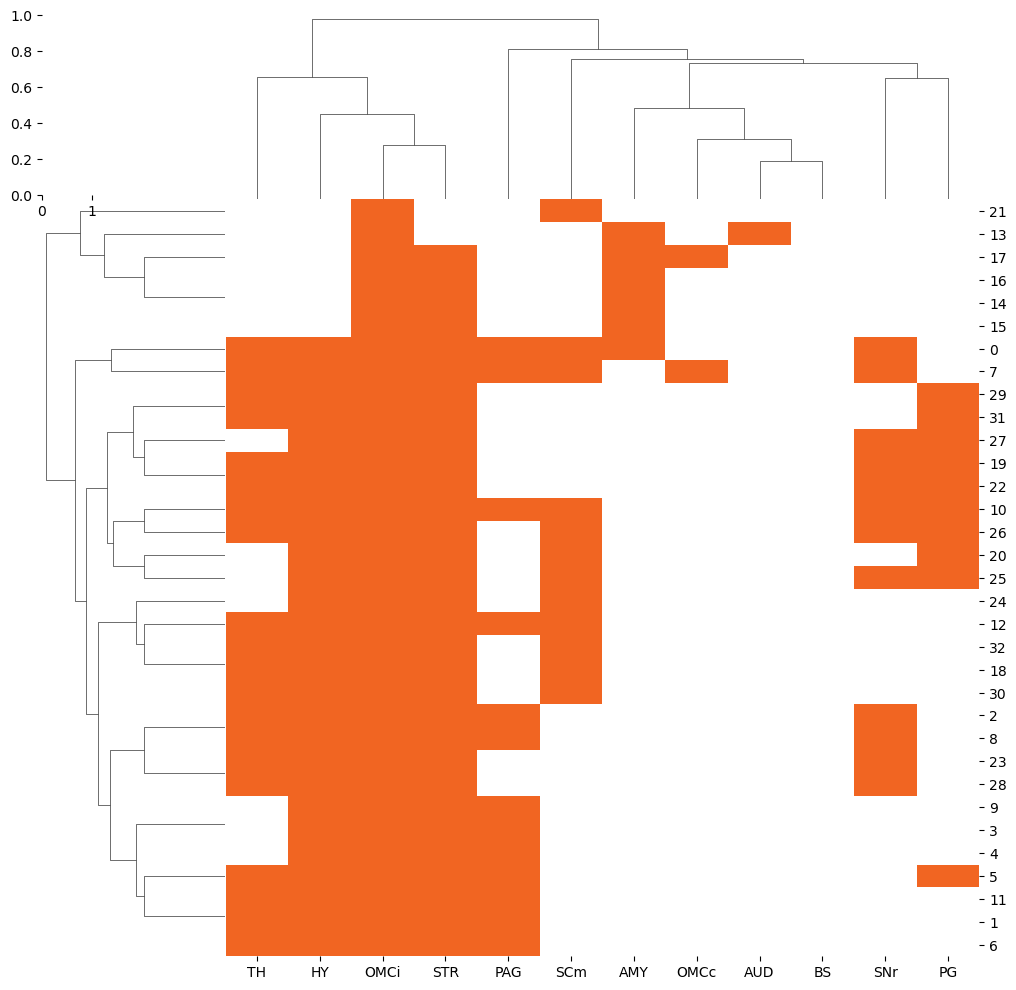

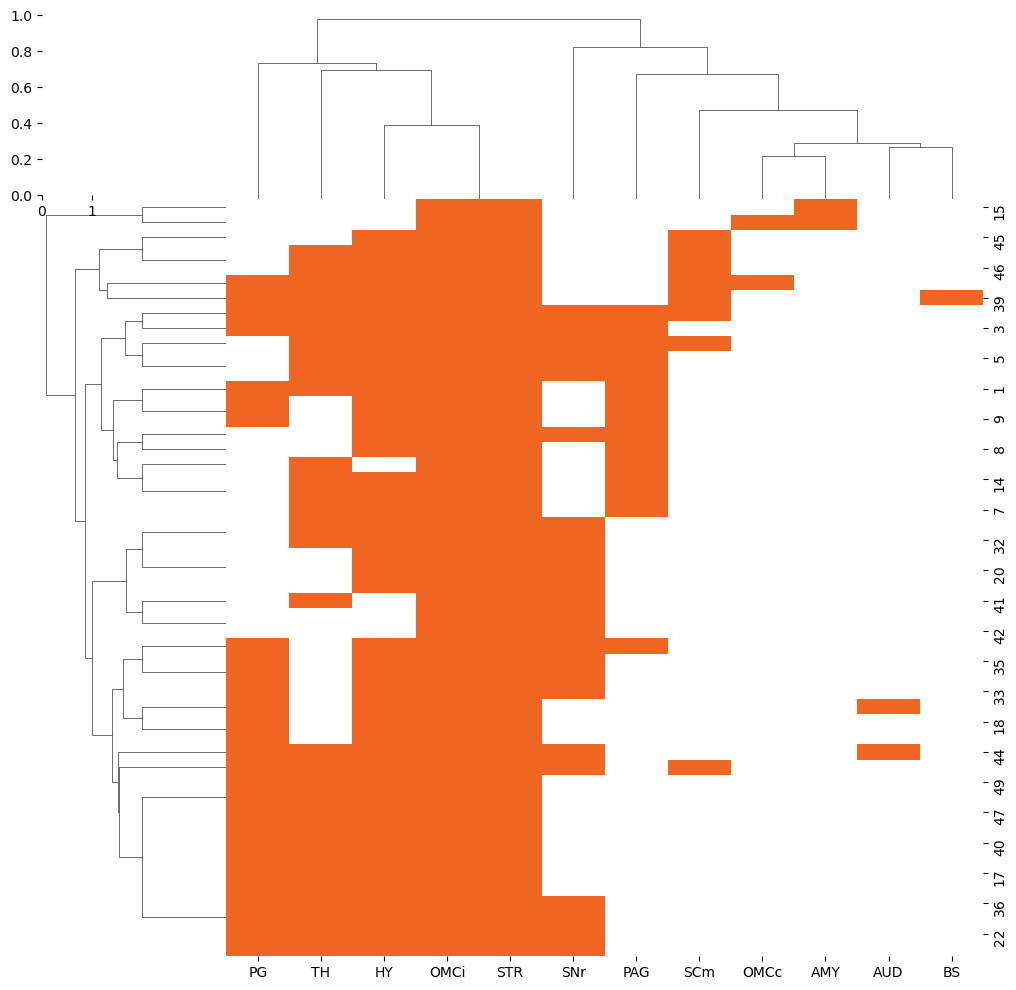

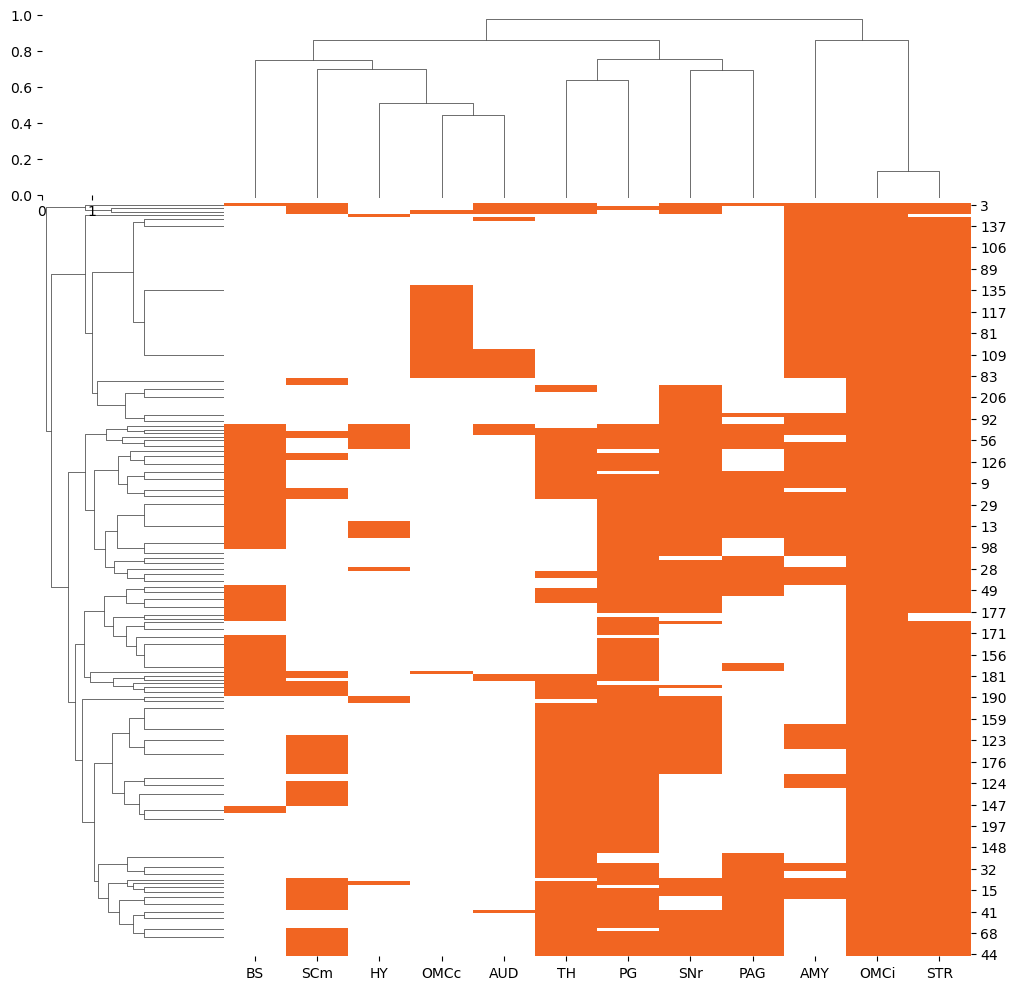

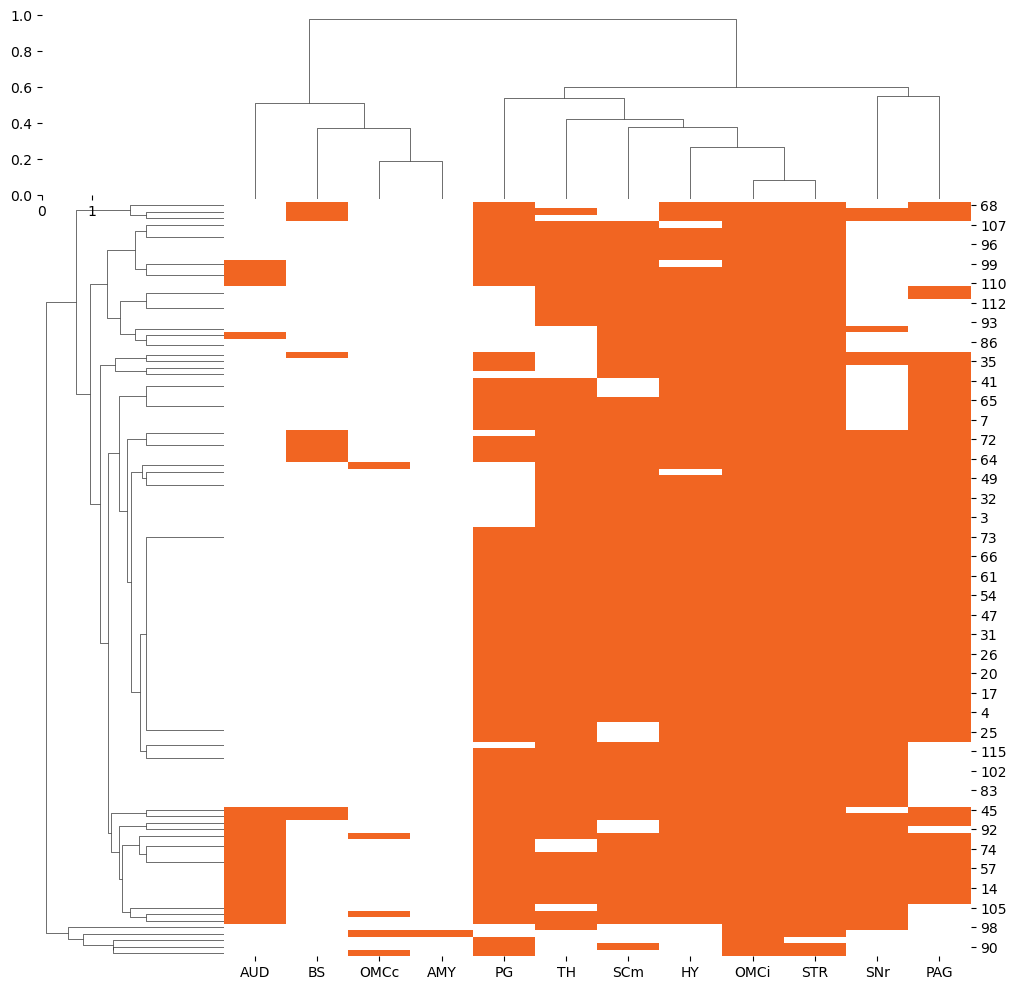

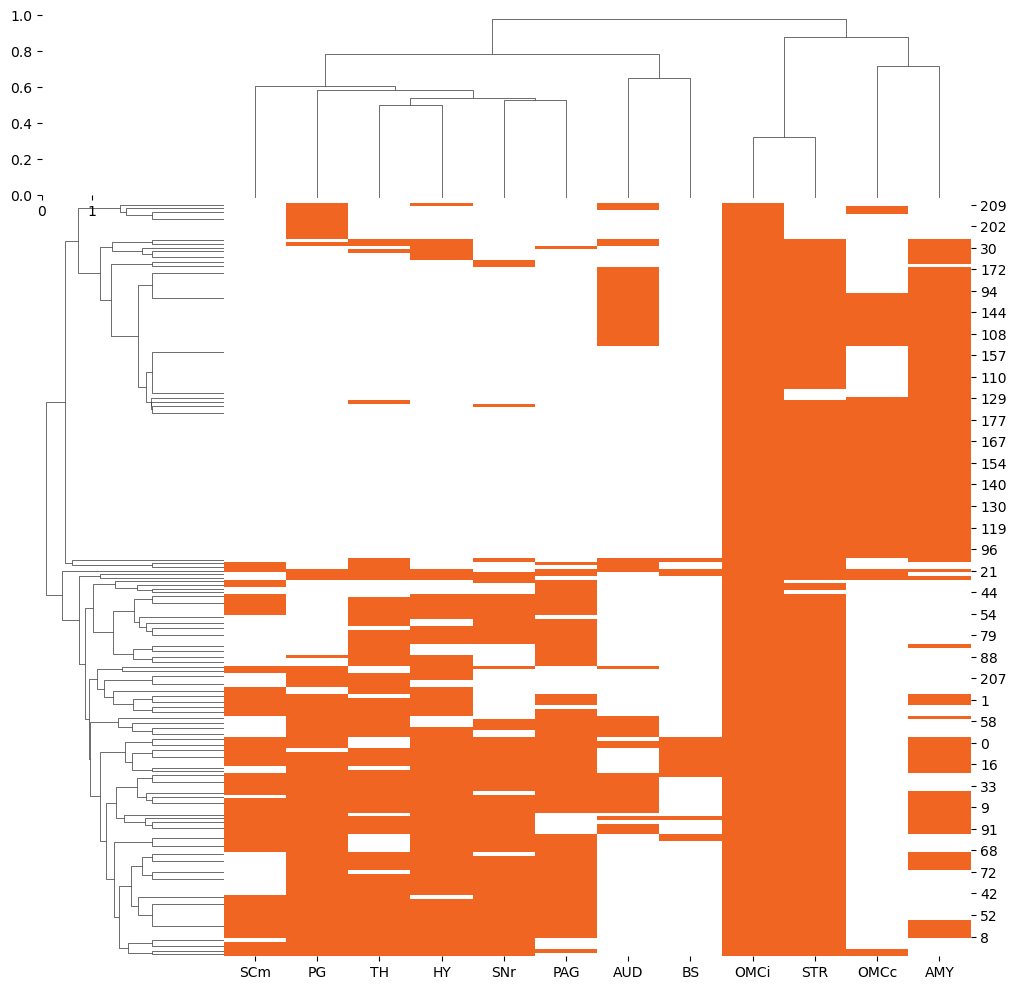

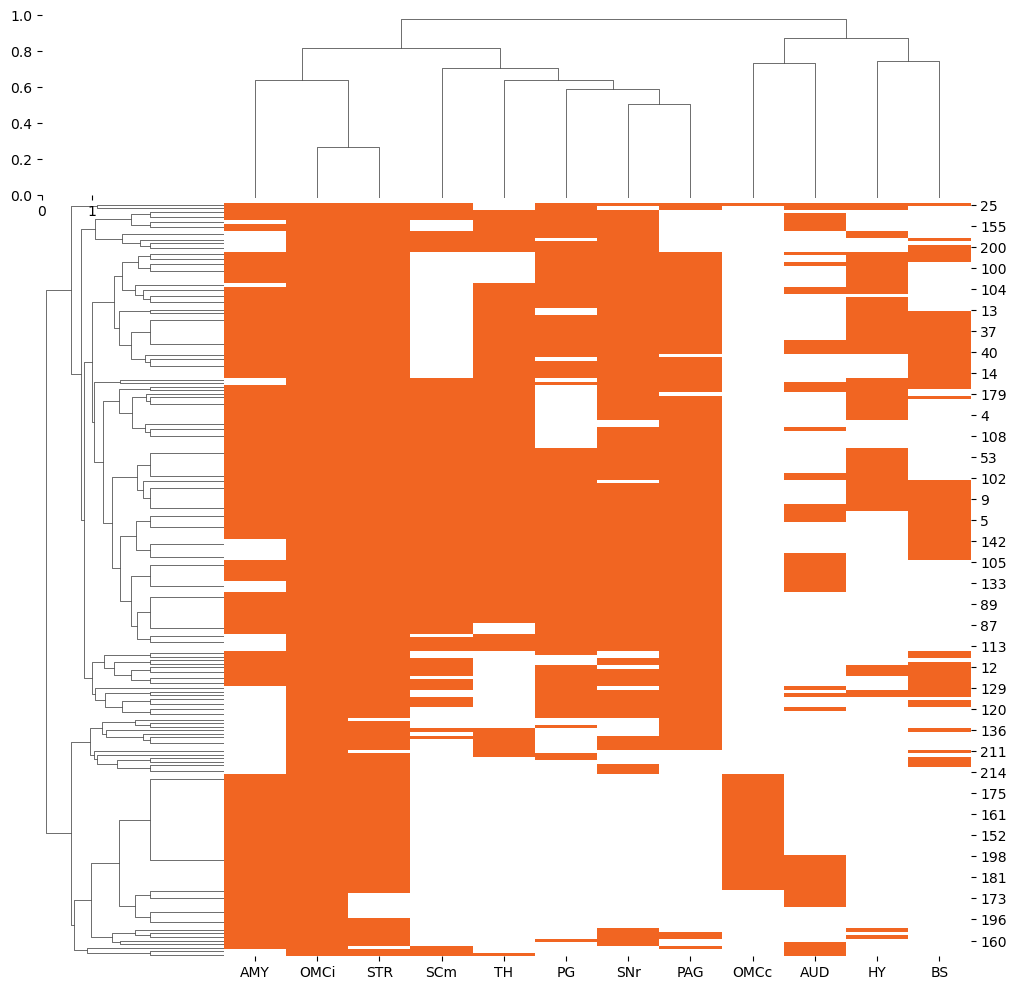

In [73]:
for i in range(5):
    sns.clustermap(omc_pt_mm[i], cmap=blue_cmp, cbar=False)
    plt.savefig(out_path+mice_mm[i]+"_pt_clustermap.jpeg", dpi=300, bbox_inches="tight")

for i in range(7):
    sns.clustermap(omc_pt_st[i], cmap=orange_cmp, cbar=False)
    plt.savefig(out_path+mice_st[i]+"_pt_clustermap.jpeg", dpi=300, bbox_inches="tight")

In [77]:
# just take auditory neurons
aud_mm = []
for i in range(len(omc_it_mm)):
    aud_idx = omc_it_mm[i]["AUD"] == 1
    aud_mm.append(omc_it_mm[i][aud_idx])

aud_st = []
for i in range(len(omc_it_st)):
    aud_idx = omc_it_st[i]["AUD"] == 1
    aud_st.append(omc_it_st[i][aud_idx])

,OMCi,OMCc,AUD,STR,TH,HY,AMY,SNr,SCm,PG,PAG,BS
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5614,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5615,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5616,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5617,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
